<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/25-1/Assignments/0331_Week5_HM_PGML_TextAnalysis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 파머완 ch8. 6, 8~9

p.534-538, 550-565

## 토픽 모델링 - 20 뉴스그룹
토픽 모델링(Topic Modeling)이란 문서 집합에 숨어 있는 주제를 찾아내는 것.

* 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 **숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출**

* LSA(Latent Semantic Analysis), LDA(Latent Dirichlet Allocation) 활용
  * 차원축소 LDA(Linear Discriminant Analysis)와는 다른 알고리즘

In [3]:
from sklearn.datasets import fetch_20newsgroups
fetch_20newsgroups(subset='all').target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

LDA 토픽 모델링을 위해 fetch_20newsgroups( ) API는 categories 파라미터를 통해 필요한 주제만 필터링해 추출하고, 추출된 텍스트를 Count 기반으로 벡터화 변환

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출.
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset = 'all', remove = ('headers','footers','quotes'),
                             categories = cats, random_state = 0)

# LDA는 Count 기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features = 1000, min_df=2, stop_words='english', ngram_range=(1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행

In [6]:
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

LatentDirichletAllocation.fit()을 수행하면 LatentDirichletAllocation 객체는 `components_` 속성값을 가지게 됨.

`components_`는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 나타냄. 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨.

In [10]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[2.69030238e+02, 1.87798026e+02, 7.09003824e+01, ...,
        1.22710343e+01, 1.06329639e+02, 7.25995512e+01],
       [1.25091799e-01, 2.46049106e+00, 1.25051902e-01, ...,
        2.80071176e+02, 1.25089783e-01, 5.05669662e+01],
       [1.33978420e+02, 1.25042012e-01, 9.98277256e+01, ...,
        1.25092219e-01, 3.31078261e+01, 1.25028398e-01],
       ...,
       [2.98813886e+01, 1.88071366e+01, 1.14748730e+01, ...,
        1.93022584e+01, 5.29368271e+00, 1.44478198e+01],
       [1.25074899e-01, 1.25105300e-01, 1.25004235e-01, ...,
        1.03576436e+02, 1.25100535e-01, 7.22276359e+01],
       [1.25172284e-01, 1.03967760e+00, 1.25221075e-01, ...,
        5.31740996e+01, 1.25025929e-01, 1.25062991e-01]])

`display_topics( )` 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word를 나열

In [11]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names_out()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
10 year medical health 1993 20 12 disease cancer team patients research number new 11
Topic # 1
don just like know think good time ve does way really people want ll right
Topic # 2
image file jpeg output program gif images format files color entry use bit 03 02
Topic # 3
armenian armenians turkish people said turkey armenia government genocide turks muslim russian greek azerbaijan killed
Topic # 4
israel jews dos jewish israeli dos dos arab state people arabs palestinian adl ed anti peace
Topic # 5
edu com available graphics ftp window use mail data motif software version pub information server
Topic # 6
god people jesus church believe say christ does christian think christians did know bible man
Topic # 7
thanks use using does help like display need problem know server screen windows window program


Topic #1, Topic #3 Topic #5가 주로 애매한 주제어가 추출...

## 문서 유사도
문서와 문서 간의 유사도 비교는 일반적으로 **코사인 유사도(Cosine Similarity)**를 사용
* 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 **상호 방향성**이 얼마나 유사 한지에 기반

## 두 벡터 사잇각
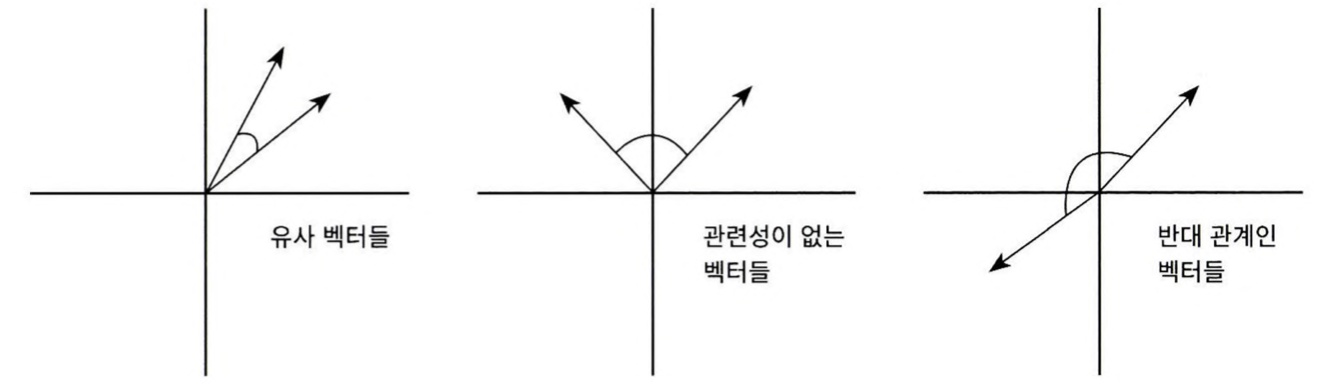

$A * B = ||A||||B||cos\theta$

➡️ $similarity$ = $cos \theta$ = $\frac{\vec{A} \cdot \vec{B}}{\|\vec{A}\| \cdot \|\vec{B}\|}$ = $\frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \cdot \sqrt{\sum_{i=1}^{n} B_i^2}}$


두 벡터의 내적을총 벡터 크기의 합으로 나눈 것. 내적 결과를 총 벡터 크기로 정규화(L2 Norm)한 것

* 두 벡터가 같은 방향 → 유사도 = 1
* 수직 → 유사도 = 0
* 반대 방향 → 유사도 = -1



코사인 유사도가 문서 유사도 비교에 많이 사용되는 이유는, 문서를 벡터화하면 차원이 높고 희소한 행렬이 되기 쉽고, 이 경우 벡터의 크기에 기반한 유사도 지표(예: 유클리드 거리)는 정확도가 떨어질 수 있기 때문

또한 문서의 길이에 따라 단어 빈도가 달라지므로, 단순한 빈도 비교는 공정하지 않으며, 코사인 유사도는 방향성을 고려하므로 문서 길이의 영향을 줄이고 의미 있는 비교가 가능!

 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 `cos_similarity()` 함수

In [12]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1,v2)
  l2_norm = (np.sqrt(sum(np.square(v1))))* (np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [15]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1,vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [16]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1 ]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0: .3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도:  0.456


사이킷런은 코사인 유사도를 측정하기 위해 `sklearn.metrics.pairwise.cosine_similarity` API를 제공
* 첫 번째 파라미터는 비교 기준이 되는 문서의 피처 행렬, 두 번째 파라미터는 비교되는 문서의 피처 행렬
* 희소 행렬, 밀집 행렬 모두 가능
* 행렬 또는 배열 모두 가능

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0],feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


첫 번째 & 첫 번째 / 첫 번째 & 두 번째 / 첫 번째 & 세 번째

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0],feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [20]:
# 쌍으로(pair)으로 코사인 유사도 값을 제공
similarity_simple_pair = cosine_similarity(feature_vect_simple,feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


## Option Review 데이터 세트를 이용한 문서 유사도 측정

Opinion Review 데이터 세트를 이용해 문서 간의 유사도를 측정

In [31]:
import pandas as pd
import glob, os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/ESAA OB/datasets/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    # Convert the DataFrame to a string before appending it to the list
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

# 빈 문서 제거
document_df = document_df.dropna(subset=['opinion_text'])

# Ensure the 'opinion_text' column contains strings
document_df['opinion_text'] = document_df['opinion_text'].astype(str)

document_df = document_df[document_df['opinion_text'].str.len() > 0]

# TF-IDF 벡터화
tfidf_vect = TfidfVectorizer(tokenizer=None, stop_words = 'english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])


# KMeans 클러스터링
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도 파악

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 index 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index: ', hotel_indexes)

# 호텔로 군집화 된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('###### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출 이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index:  Index([2, 6, 7, 12, 14, 16, 17, 18, 20, 21, 24, 30, 31, 32, 38, 39, 40, 45,
       46],
      dtype='int64')
###### 비교 기준 문서명 bathroom_bestwestern_hotel_sfo 와 타 문서 유사도######
[[1.         0.04462561 0.0504151  0.04016839 0.0499816  0.06208166
  0.01568418 0.02005241 0.05700464 0.05640928 0.03218345 0.48125539
  0.24862002 0.19378285 0.10674693 0.13203572 0.12948538 0.08793586
  0.06893196]]


가장 유사도가 큰 파일명 및 유사도:
 filename      room_holiday_inn_london
similarity                   0.481255
Name: 30, dtype: object


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

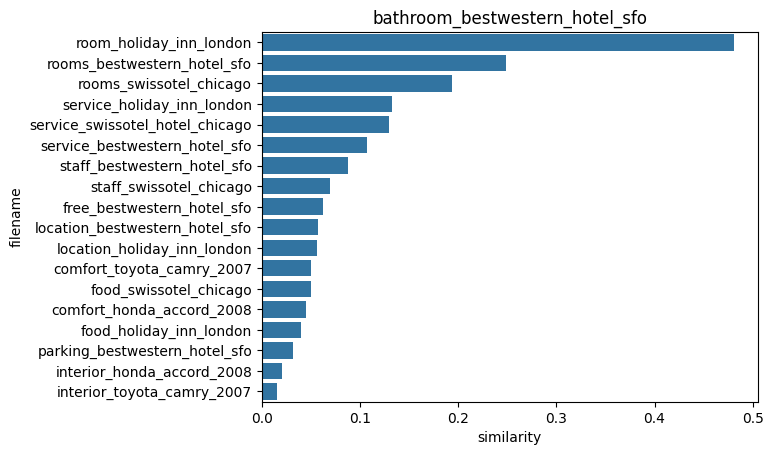

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity']=hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0, :])
sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

# 9. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

## 한글 NLP 처리의 어려움

띄어쓰기와 조사로 인해 한글 언어 처리는 어려움.(의미 왜곡, 어근 추출 전처리 까다로움)

## KoNLPy 소개
`KoNLPy`는 파이썬의 대표적인 한글 형태소 패키지. 형태소의 사전적인 의미는 ‘단어로서 의미 를 가지는 최소 단위'.

형태소 분석(Morphological analysis)이란 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업을 지칭

In [45]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 24.0 MB/s eta 0:00:00


In [47]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ESAA OB/datasets/ratings_train.txt', sep = '\t', encoding = 'utf-8')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [48]:
train_df.label.value_counts()

,count
label,
0,75173
1,74827


In [49]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA OB/datasets/ratings_test.txt', sep='\t', encoding='utf-8')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

In [51]:
# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [52]:
# 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화
# Twitter 클래스는 SNS 분석에 적합.

from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  tokens_ko = twitter.morphs(text) # morphs(): 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환
  return tokens_ko

/usr/local/lib/python3.11/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer = tw_tokenizer, ngram_range = (1,2), min_df = 3, max_df = 0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

# 로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = { 'C': [1, 3.5, 4.5, 5.5, 10] }
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [58]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifer는 GridSearchCV에서 최적 파라미터로 학습된 classifer를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86172
